<a href="https://colab.research.google.com/github/Najiya98/employee-future-prediction/blob/main/employee_future_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predict employee future in company


In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report



**load** **data**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/project/Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


data analysis

In [3]:
df.shape

(4653, 9)

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df=pd.read_csv("/content/drive/MyDrive/project/Employee.csv")
df['LeaveOrNot'].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

data preprocessing

In [8]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

data visualization

<Axes: xlabel='Gender', ylabel='count'>

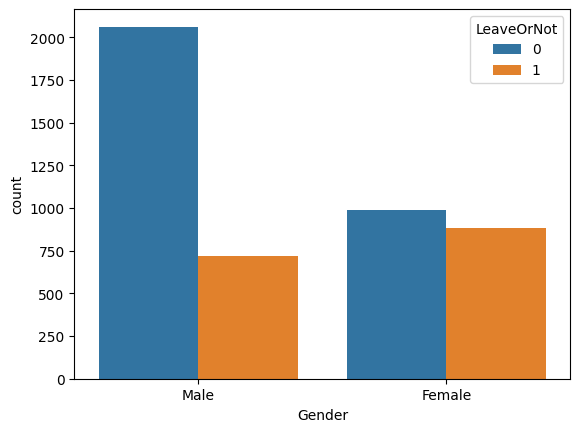

In [10]:
sns.countplot(x='Gender',data=df,hue='LeaveOrNot')

<Axes: xlabel='Education', ylabel='count'>

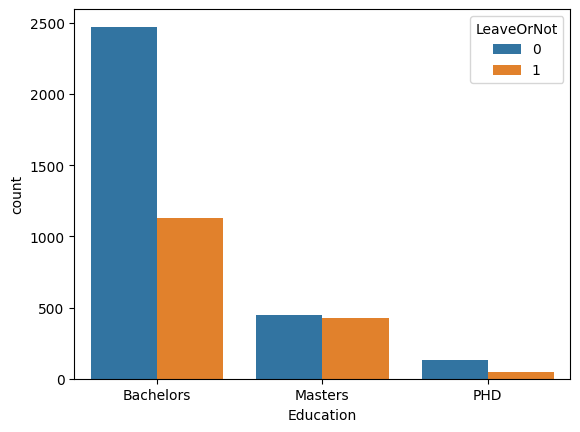

In [11]:
sns.countplot(x='Education',data=df,hue='LeaveOrNot')

<Axes: xlabel='City', ylabel='count'>

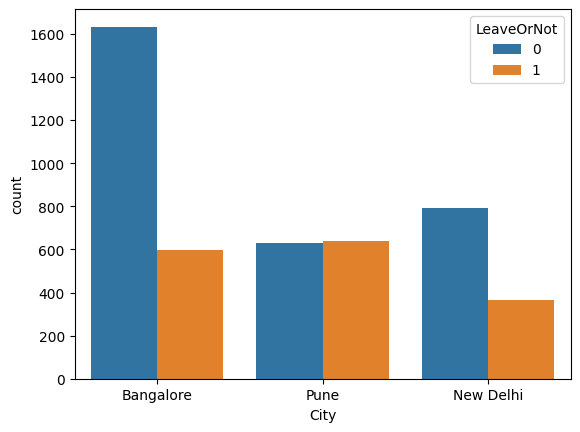

In [12]:
sns.countplot(x='City',data=df,hue='LeaveOrNot')

<Axes: xlabel='PaymentTier', ylabel='count'>

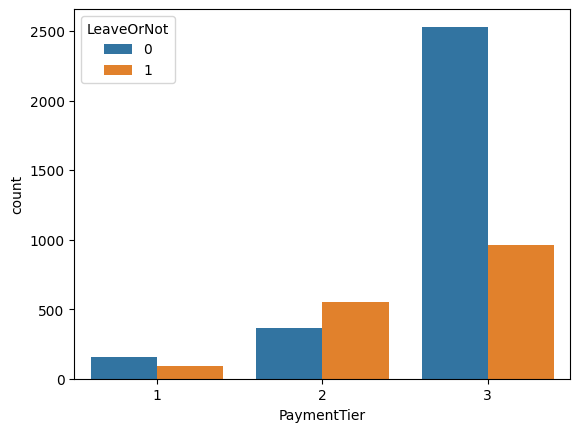

In [13]:
sns.countplot(x='PaymentTier',data=df,hue='LeaveOrNot')

<Axes: xlabel='JoiningYear', ylabel='count'>

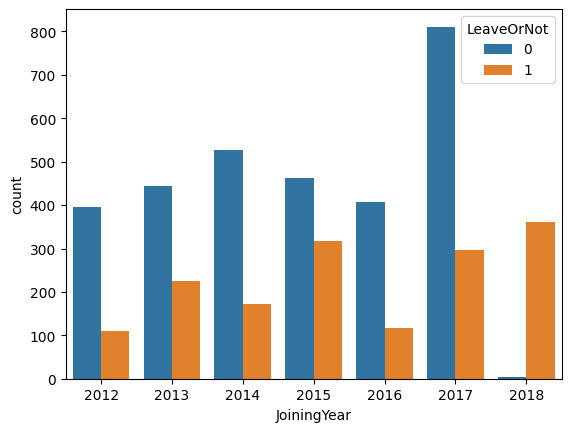

In [14]:
sns.countplot(x='JoiningYear',data=df,hue='LeaveOrNot')

<Axes: xlabel='Age', ylabel='count'>

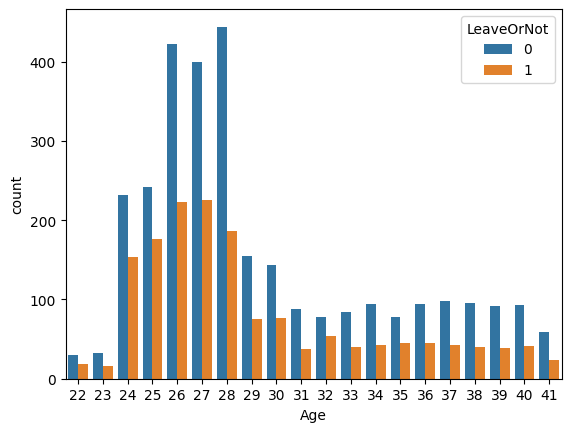

In [15]:
sns.countplot(x='Age',data=df,hue='LeaveOrNot')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

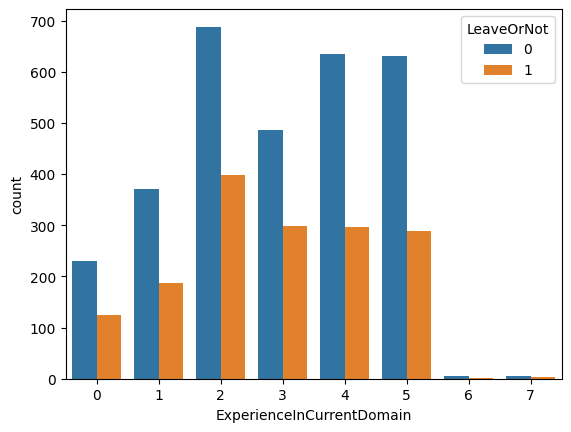

In [16]:
sns.countplot(x='ExperienceInCurrentDomain',data=df,hue='LeaveOrNot')

<Axes: xlabel='EverBenched', ylabel='count'>

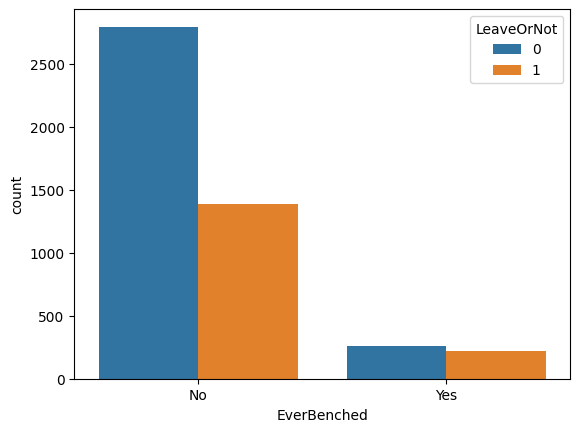

In [17]:
sns.countplot(x='EverBenched',data=df,hue='LeaveOrNot')

In [18]:
# transform data in to categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
le1=LabelEncoder()
df['Gender']=le1.fit_transform(df['Gender'])
le2=LabelEncoder()
df['EverBenched']=le2.fit_transform(df['EverBenched'])
le3=LabelEncoder()
df['City']=le3.fit_transform(df['City'])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [19]:
x=df.iloc[:,:-1]
x

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [20]:
y=df.iloc[:,-1]
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [21]:
# correlation
df.corr(numeric_only=True)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


<Axes: >

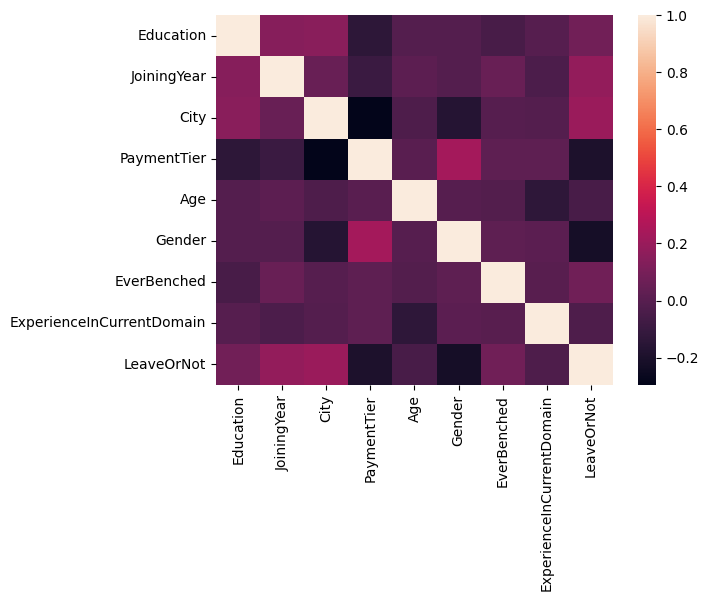

In [22]:
# heatmap
sns.heatmap(df.corr(numeric_only=True))

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.83333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 1.        , ..., 0.        , 0.        ,
        0.42857143],
       [0.        , 0.33333333, 0.5       , ..., 0.        , 0.        ,
        0.28571429],
       ...,
       [0.5       , 1.        , 0.5       , ..., 1.        , 0.        ,
        0.71428571],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.28571429],
       [0.        , 0.5       , 0.        , ..., 1.        , 1.        ,
        0.57142857]])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)

:build model

**knn**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [26]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0])

80.73065902578797
[[801  93]
 [176 326]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       894
           1       0.78      0.65      0.71       502

    accuracy                           0.81      1396
   macro avg       0.80      0.77      0.78      1396
weighted avg       0.80      0.81      0.80      1396



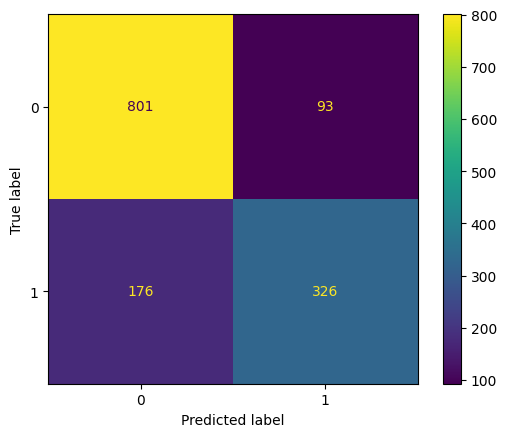

In [27]:
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

**svc**

In [28]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred1=sv.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0])

80.94555873925502
[[853  41]
 [225 277]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       894
           1       0.87      0.55      0.68       502

    accuracy                           0.81      1396
   macro avg       0.83      0.75      0.77      1396
weighted avg       0.82      0.81      0.80      1396



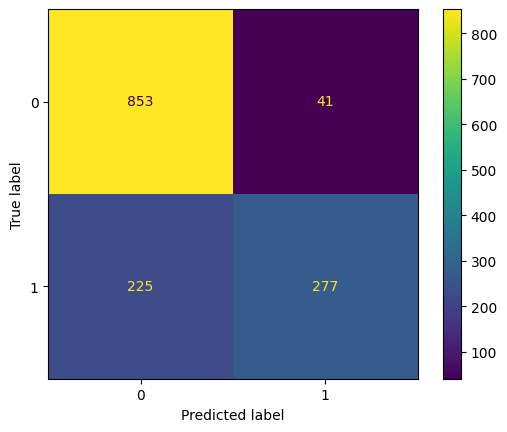

In [29]:
print(accuracy_score(y_test,y_pred1)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

**naive** **bayes**

In [30]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred2=nb.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 1, 0])

68.98280802292264
[[731 163]
 [270 232]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       894
           1       0.59      0.46      0.52       502

    accuracy                           0.69      1396
   macro avg       0.66      0.64      0.64      1396
weighted avg       0.68      0.69      0.68      1396



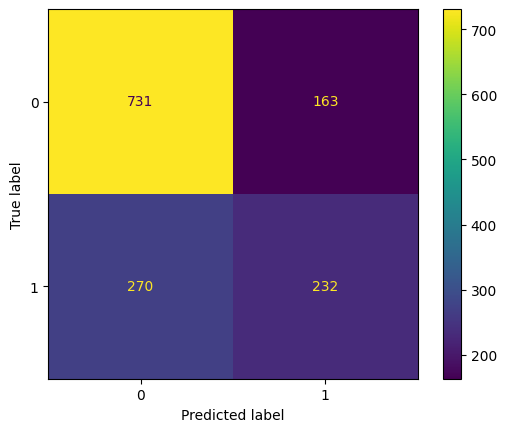

In [31]:
print(accuracy_score(y_test,y_pred2)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

**decisiontreeclassifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=4)
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0])

79.44126074498567
[[874  20]
 [267 235]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       894
           1       0.92      0.47      0.62       502

    accuracy                           0.79      1396
   macro avg       0.84      0.72      0.74      1396
weighted avg       0.82      0.79      0.77      1396



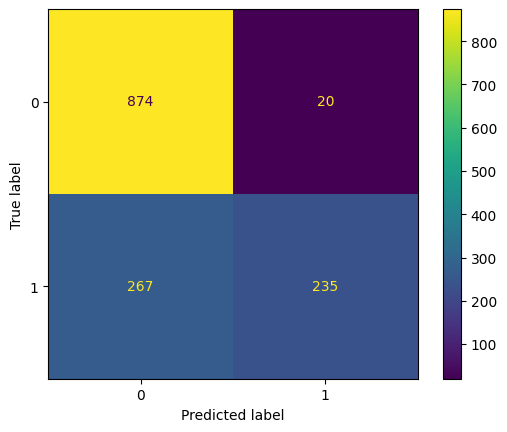

In [33]:
print(accuracy_score(y_test,y_pred4)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

**randomforestclassifier**

In [34]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)
y_pred5=dt.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

79.44126074498567
[[874  20]
 [267 235]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       894
           1       0.92      0.47      0.62       502

    accuracy                           0.79      1396
   macro avg       0.84      0.72      0.74      1396
weighted avg       0.82      0.79      0.77      1396



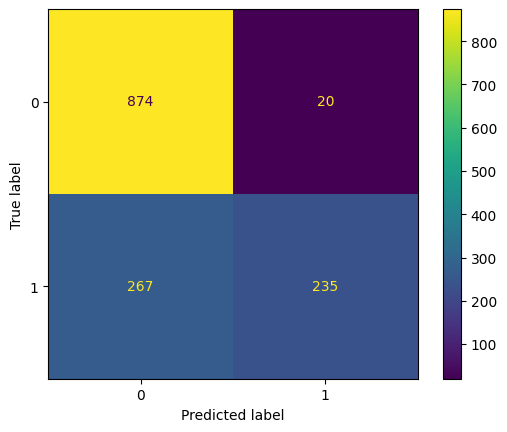

In [35]:
print(accuracy_score(y_test,y_pred5)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

**tunning**

In [36]:
sv1=SVC()

In [37]:
params={'kernel':['linear','poly','rbf'],'gamma':['auto','scale']}
gsv=GridSearchCV(sv1,params,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'gamma': 'scale', 'kernel': 'poly'}


In [38]:
sv2=SVC(kernel='poly',gamma='scale')
sv2.fit(x_train,y_train)
y_pred1=sv2.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
score=accuracy_score(y_test,y_pred1)
score

0.8159025787965616

In [40]:
knn1=KNeighborsClassifier()

In [41]:
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
gsv=GridSearchCV(knn1,params,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [42]:
knn1=KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn1.fit(x_train,y_train)
y_pred=knn1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [43]:
score=accuracy_score(y_test,y_pred)
score

0.8223495702005731

In [44]:
# knn is the best model

**deploy**

In [45]:
import pickle
pickle.dump(rf,open('model1.sav','wb'))
pickle.dump(scaler,open('scaler1.sav','wb'))

NameError: name 'rf' is not defined